#### Load the dataset

In [1]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')
valid = pd.read_csv('validation.csv')



## Data exploration
#### join the dataset together to prevent data leakage if used separately, overfitting and to allow no biased evaluation


In [2]:
data = pd.concat([train, test, valid], ignore_index=True)


In [3]:
data['text'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [4]:
print (data.shape)
print(data.sample(5))
print(data.head())

(20000, 2)
                                                    text  label
8483   i feel like i am a little ungrateful but i lov...      0
2720   i inquire incheswhyinches are people relocatin...      1
2023   i can describe what happens to me is that i fe...      4
14915  i have a feeling the dragon will be back again...      3
5819                            i feel shaken and scared      4
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


### Chcek the numbers of the combined dataqset


In [5]:
data['label'].value_counts().sum()

20000

#### Visualization of the results

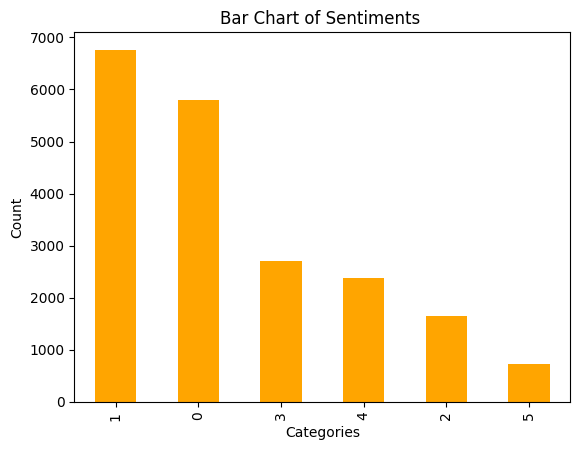

In [6]:
import matplotlib.pyplot as plt
data['label'].value_counts().plot(kind='bar', color='orange')
plt.title('Bar Chart of Sentiments ')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [7]:
data['label'].isnull().sum()
        
data['text'].isnull().sum()



0

#### Convert text to lowercase, remove stopwords, punctuation, numbers, and unnecessary whitespace


In [8]:
import re
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))
#im having issue with downloading the data, network issue proably. so i source for it online
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
    'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
    'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 
    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
    'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
    'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
    "weren't", 'won', "won't", 'wouldn', "wouldn't"
])


def handle_negation(text):

    
    negation_pattern = re.compile(r'\b(not|no|never|none|cannot|can\'t|don\'t|isn\'t|aren\'t|wasn\'t|won\'t|wouldn\'t|doesn\'t|didn\'t|hasn\'t|haven\'t|hadn\'t|couldn\'t)\b\s*(\w+)', re.IGNORECASE)
    return negation_pattern.sub(lambda match: f'neg_{match.group(2)}', text)

def clean_text(text):
    text = text.lower()
    
    text = handle_negation(text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin tokens to form the cleaned sentence
    return ' '.join(tokens)


data['text'] = data['text'].apply(clean_text)



In [9]:
for column in data:
    print(column)
    print(f'{column}:{data[column].unique()}')

text
text:['didnt feel humiliated'
 'go feeling hopeless damned hopeful around someone cares awake'
 'im grabbing minute post feel greedy wrong' ...
 'feel important share info experience thing'
 'truly feel passionate enough something stay true succeed'
 'feel like wan na buy cute make see online even one']
label
label:[0 3 2 5 4 1]


In [10]:
data.sample(21)

,text,label
3638,feel longing,2
14131,negsure moment thought would able feel hellip ...,5
1288,uploaded put link previous post good six days ...,1
17573,feel honoured great man claims friend,1
15293,feel like im greedy say want money,3
16891,imagined form fitting clothing beautiful looki...,1
15220,im feeling horny dead goat,2
177,wish okay thinking earlier today heres thing c...,0
14945,really hard time feeling hopeful much last months,1
9789,im pretty picky folks link want list sites fee...,1



### Sentiments and values the represent
##### Sadness = 0
##### Joy = 1
##### Love = 2
##### Anger = 3
##### Fear = 4

### Data Splitting and model Etraining and evaluation

In [39]:
x = data['text']
y= data['label']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()

x = vectorizer.fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=130, stratify = y)


In [41]:
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [42]:



# List of models to train
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    # Evaluate the model
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8936111111111111
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1044
           1       0.90      0.93      0.92      1217
           2       0.84      0.77      0.80       295
           3       0.91      0.87      0.89       488
           4       0.88      0.82      0.85       427
           5       0.82      0.72      0.77       129

    accuracy                           0.89      3600
   macro avg       0.88      0.84      0.86      3600
weighted avg       0.89      0.89      0.89      3600

Decision Tree Accuracy: 0.8725
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1044
           1       0.93      0.88      0.90      1217
           2       0.77      0.78      0.78       295
           3       0.85      0.89      0.87       488
           4       0.80      0.84      0.82       427
           5       0.73      0.74      0.73       12

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Logistic regression and decision tree with their hyperparameter grids for optimization
model_params = [
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    })

]

# Loop through each model and perform cross-validation, hyperparameter tuning, and evaluation
for name, model, params in model_params:
    print(f"\n{name} Model Optimization")
    
    # Perform GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(x_train, y_train)
    
    # Best parameters and accuracy from Grid Search
    print(f"Best Hyperparameters: {grid.best_params_}")
    
    # Cross-validation scores on training set
    cv_scores = cross_val_score(grid.best_estimator_, x_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy (Train): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Evaluate on the test set
    y_pred = grid.best_estimator_.predict(x_test)
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    
    # Check for overfitting (training vs test accuracy)
    train_accuracy = grid.best_estimator_.score(x_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    #  classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))



Logistic Regression Model Optimization


####  Logistic Regresssion is the best shot

In [44]:
clf = LogisticRegression(solver="liblinear",max_iter=200)

In [45]:
clf.fit(x_train ,y_train)


LogisticRegression(max_iter=200, solver='liblinear')

In [46]:
y_test_pred = clf.predict(x_test)


In [47]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1044
           1       0.90      0.94      0.92      1217
           2       0.85      0.75      0.80       295
           3       0.92      0.88      0.90       488
           4       0.88      0.83      0.86       427
           5       0.83      0.69      0.75       129

    accuracy                           0.90      3600
   macro avg       0.88      0.84      0.86      3600
weighted avg       0.89      0.90      0.89      3600



In [48]:
import pickle
pickle.dump(clf, open('emotion.pkl','wb'))

In [49]:
pickle.dump(vectorizer, open("vectorizer.pkl","wb"))


In [50]:
clf = pickle.load(open("emotion.pkl","rb"))
